<a href="https://colab.research.google.com/github/ashishpatel26/Ganpat-University-Data-Science/blob/main/Lecture_4_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
plt.style.use('fivethirtyeight')
import graphviz 

In [72]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv", header=None, names=col_names)
pima

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [73]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [74]:
pima.isnull().sum()

pregnant    0
glucose     0
bp          0
skin        0
insulin     0
bmi         0
pedigree    0
age         0
label       0
dtype: int64

Number of negative outcomes 268
Number of positive outcomes 500


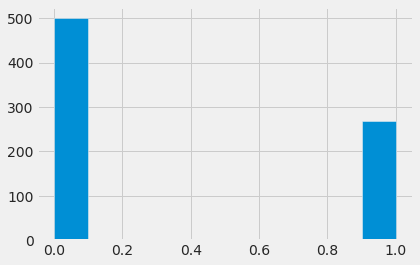

In [75]:
plt.hist(pima["label"])
print("Number of negative outcomes",np.count_nonzero(pima["label"]))
print("Number of positive outcomes",len(pima["label"])-np.count_nonzero(pima["label"]))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: pregnant, dtype: float64

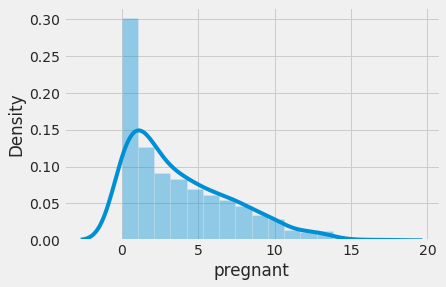

In [76]:
sns.distplot(pima["pregnant"])
pima["pregnant"].describe()

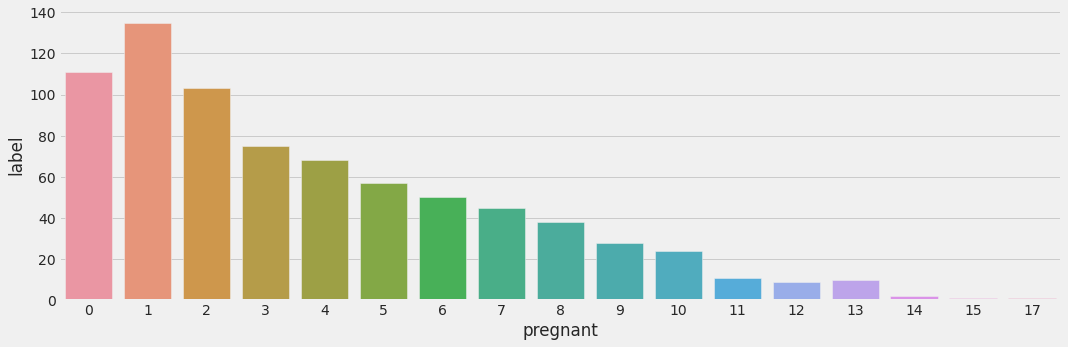

In [77]:
attribute, target  = "pregnant", "label"
total = pima[[attribute, target]].groupby([attribute],as_index=False, sort=True).count()
fig, ax1 = plt.subplots(1,1,figsize=(16,5))
sns.barplot(x=attribute, y=target, data=total, ax=ax1)
ax1.set(xlabel=attribute, ylabel=target)
plt.show()

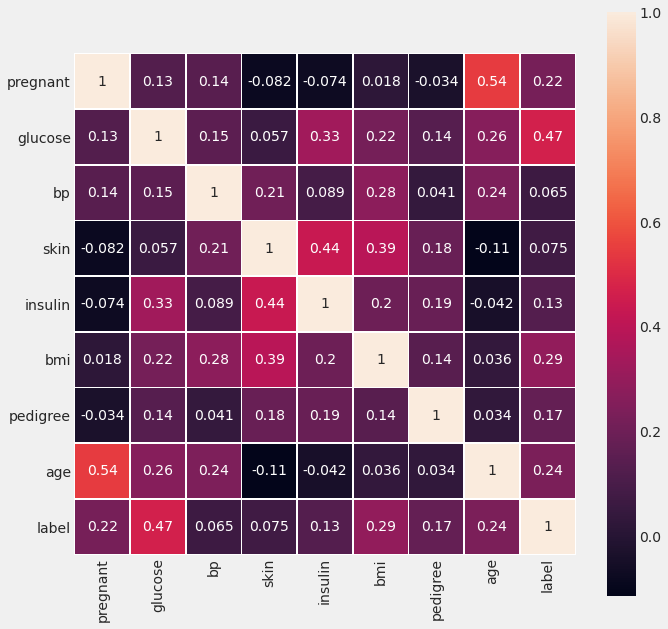

In [78]:
corrmat = pima.corr() # Correlation matrix.
f, ax = plt.subplots(figsize=(10, 10))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True)
plt.show()

In [79]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [80]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [81]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [82]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6753246753246753


In [83]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

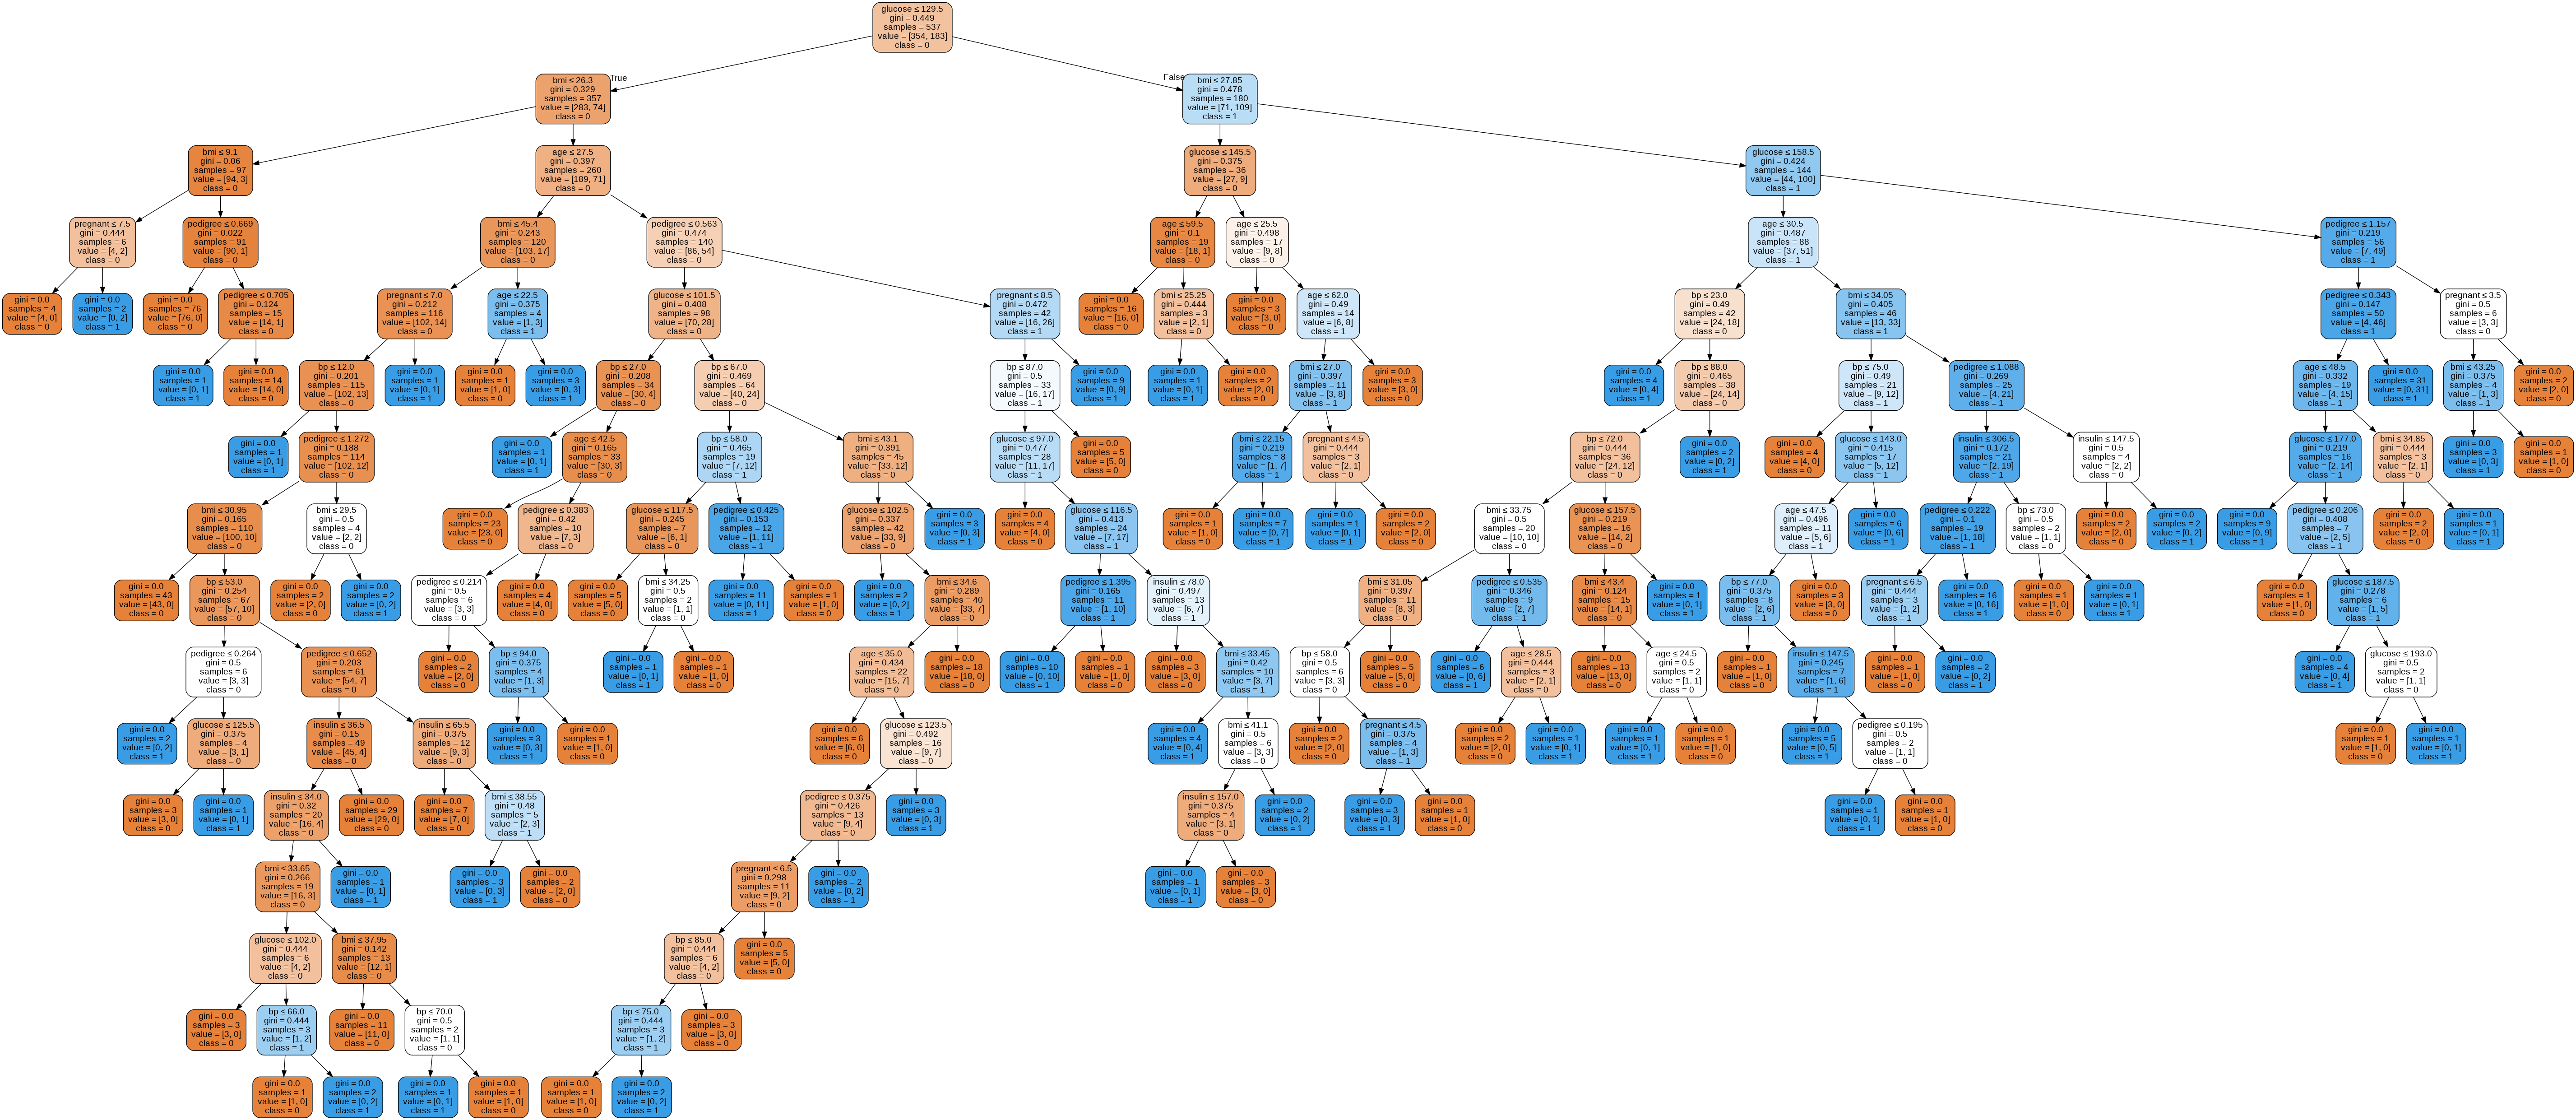

In [84]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [85]:
from sklearn.metrics import classification_report, confusion_matrix,  cohen_kappa_score, accuracy_score

In [86]:
print("Classification Report : \n",classification_report(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred) * 100)
print("Cohen Kappa :", cohen_kappa_score(y_test, y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.74      0.76      0.75       146
           1       0.56      0.53      0.55        85

    accuracy                           0.68       231
   macro avg       0.65      0.64      0.65       231
weighted avg       0.67      0.68      0.67       231

Accuracy : 67.53246753246754
Cohen Kappa : 0.2932898225576177


[[129  17]
 [ 34  51]]


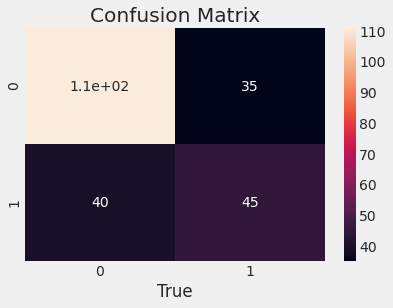

In [87]:
print(cm)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)
plt.xlabel("Predicte")
plt.xlabel("True")
plt.title("Confusion Matrix")
plt.show()

In [88]:
from  sklearn.model_selection import GridSearchCV

In [90]:
params = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': list(range(2, 50))}
clf_gs = grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=5,  n_jobs=-1)
clf_gs.fit(X_train,y_train)

Fitting 5 folds for each of 4704 candidates, totalling 23520 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 522 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 5322 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 13322 tasks      | elapsed:   53.4s
[Parallel(n_jobs=-1)]: Done 23520 out of 23520 | elapsed:  1.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
  

In [91]:
clf_gs.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=11,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [92]:
#Predict the response for test dataset
y_pred = clf_gs.predict(X_test)

In [93]:
print("Classification Report : \n",classification_report(y_test, y_pred))
print("Accuracy :", accuracy_score(y_test, y_pred) * 100)
print("Cohen Kappa :", cohen_kappa_score(y_test, y_pred))

Classification Report : 
               precision    recall  f1-score   support

           0       0.79      0.88      0.83       146
           1       0.75      0.60      0.67        85

    accuracy                           0.78       231
   macro avg       0.77      0.74      0.75       231
weighted avg       0.78      0.78      0.77       231

Accuracy : 77.92207792207793
Cohen Kappa : 0.5046461758398857


[[129  17]
 [ 34  51]]


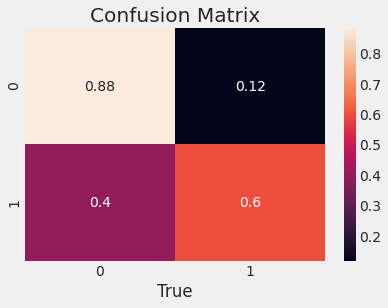

In [95]:
print(cm)
cm = confusion_matrix(y_test, y_pred,  normalize="true")
sns.heatmap(cm, annot = True)
plt.xlabel("Predicte")
plt.xlabel("True")
plt.title("Confusion Matrix")
plt.show()